<a href="https://colab.research.google.com/github/MohammedAL-Ani/GA-with-TSP-using-Python/blob/main/TSP_moh_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSP moh-GA 

## GA Pseudocode
```
produce an initial population of individuals
evaluate the fitness of all individuals
while termination condition not met do
	select fitter individuals for reproduction
	recombine between individuals
	mutate individuals
	evaluate the fitness of the modified individuals
	generate a new population
End while                                    
```

## Main Functions

In [1]:
# coding: utf-8
import sys
import time
import math
import random


def selctFitterIndividuals(chromo, num_parents):
    chromObjects =[]
    candidateParents = []
    TOTAL_FITNESS = 0
    for c in chromo:
        chromObjects.append((c,cost(c,DIC)))
        TOTAL_FITNESS += cost(c,DIC)
    
    chromObjects.sort(key = lambda x:x[1],reverse=True) # in descending order 4, 3, 2, 1 etc.
    
    #divide chromObjects into solution, fitness, and index
    index = []
    solution = []
    fitness = []
    PF =0
    probabilityFitness = []
    for i,c in enumerate(chromObjects):
        index.append(i) 
        solution.append(c[0])        
        fitness.append(c[1])
        PF += (TOTAL_FITNESS/c[1])
        
    for i,c in enumerate (chromObjects):       
        probabilityFitness.append((TOTAL_FITNESS/c[1])/PF)
            
    # Selecting the suitable parent usin Fitness Proportionate Selection
    # Implemented by Roulette Wheel Selection NOT Stochastic Universal Sampling (SUS)
    for k in range (num_parents): # k is the number of parents we want to select
        # Generate Random Number        
        r_num = random.random()        
        i = 0
        sub_fitness = probabilityFitness[i]        
        chosenIndiv = solution[i]
        while (sub_fitness <= r_num ):
            sub_fitness += probabilityFitness[i]
            chosenIndiv = solution[i]
            i +=1        
        candidateParents.append(chosenIndiv)
    return candidateParents 

def mutation(c,rate_level): #rate_level : MOUTATION_LEVE
    r = random.random()
    # do mutation if r < mutation probability
    if(r <= rate_level): 
        c = swap(1, c)        
        return c
    return c

# check if a solution is feasible or not 
def isFeasible(chromo,num_cities):
    replicate = findRepeatedValues(chromo,num_cities)
    if len(replicate) > 0:
        return False
    else:
        return True
    
# To make an infeasible solution feasible
def repair(c1, index, misv):    
    c = copy.copy(c1)
    j = 0
    for i in index:
        c[i] = misv[j]
        j+=1
    return c
# To find missing values in a path , to make it a feasible solution
def findMissingValues(parent, c):    
    misv = copy.deepcopy(parent)
    for i in parent:
        if i in c : 
            misv.remove(i)
    return misv
    
# To find the repeated items (the values itself)
def findRepeatedValues(chromo,num_cities):
    # Find duplicate values
    rep = []
    c1d = dict(Counter(chromo))
    for i in range(num_cities):
        key = i+1
        try:
            if(c1d[key] == 2):
                rep.append(key)
        except:
            continue
    return rep

# To find index of the repeated items in the chromosome = the index of the second value
def findIndexOfRepeatedValues(chromo_repeat_list,chromo):
    # Find duplicate values (index)
    indexs = []
    for target in chromo_repeat_list:
        for j in range(len(chromo),0,-1):
            jIndex = j -1
            if chromo[jIndex] == target:
                indexs.append(jIndex)
                break
    return indexs

def ReadDic(dicPath = './dataset.txt'):
    dic={}
    with open(dicPath) as f:
        r=f.read()
        read_line = r.split('\n')              
        
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        
        f.close()
    return dic

def initial(num): ## generate init city sequence
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)            
    return seq

def cost(seq,dic):    
    dist = 0
    for i in range(len(seq)):
        axis = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])  # distance(d)
    return dist

def swap(swap_num,c):
    c = c.copy()
    def selectIndexs(swap_num=swap_num,c=c):
        c = c.copy()
        swIndexs = []
        while(len(swIndexs) != swap_num):
            ranIndex = random.randint(0,len(c)-1)
            if ranIndex not in swIndexs:
                swIndexs.append(ranIndex)
        return swIndexs
    swIndexs1 = selectIndexs()
    swIndexs2 = selectIndexs()
    
    for i in range(len(swIndexs1)):
        tmp = c[swIndexs1[i]]
        c[swIndexs1[i]] = c[swIndexs2[i]]
        c[swIndexs2[i]] = tmp
    return c.copy()

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

def showPlot(PATH_SEQ,title):
    # Read
    DIC = ReadDic()
    with open('./dataset.txt','r') as f:
        dataset = f.read()
    dataset = dataset.split("\n")

    # x y
    x=[]
    y=[]
    for i in dataset:
        newi = i.split(" ")
        x.append(int(newi[1]))
        y.append(int(newi[2]))

    myX = []
    myY = []
    myPath = PATH_SEQ
    for i in myPath:
        _x,_y = DIC[i]
        myX.append(_x)
        myY.append(_y)
    
    # matplotlib.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(x, y,'o',color ='chartreuse')
    ax.set_title(title,color='blue')
    plt.plot(myX,myY,linestyle='--' ,color='maroon')
    plt.show()

## Main

In [3]:
import random
from collections import Counter
import copy
#initial   
NUM_CITIES = 30
DIC = ReadDic()
endItt = 1500
GENERATIONS = 1500
INITIAL_POPULATION_NUM = 8
CROSSOVER_LEN = 4
MOUTATION_LEVEL = 0.25 
CROSSOVER_PROBABILITY = 0.75
NUM_PARENTS = int(INITIAL_POPULATION_NUM * CROSSOVER_PROBABILITY)
valRec = []
if __name__ == '__main__':
    # generate initial population
    chromo = [] 
    for i in range(INITIAL_POPULATION_NUM):#from (1-8) seq
        chromo.append(initial(NUM_CITIES))        

    for CURRENT_GENERATION in range(GENERATIONS):
        parentsChromo = copy.deepcopy(chromo)
        #fitterIndividuals = selctFitterIndividuals(chromo)
        
        #selctFitterIndividuals(chromo, 8)
        #fitterIndividuals = selctFitterIndividuals(chromo, INITIAL_POPULATION_NUM)
        chromo = selctFitterIndividuals(chromo, NUM_PARENTS)
        
        splitPointStart = random.randint(0,NUM_CITIES - CROSSOVER_LEN)#0-(30-4)number of crose over
        splitPointEnd = splitPointStart + CROSSOVER_LEN
        #print("Round:"+str(NOW_ITER))
        
        # Re-order them randomly
        random.shuffle(chromo)

        # Mating (It depends on how many parents you want to mate them.. take care crossover probability)
        for i in range(0,NUM_PARENTS,2):
            # Take out the gene (two parents)
            c1 = chromo[i].copy()
            c2 = chromo[i+1].copy()
            parent1 = copy.deepcopy(chromo[i]) # It is a feasible solution
            parent2 = copy.deepcopy(chromo[i+1])
            
            #combine between two parent
            # Get slice
            c1Split = c1[splitPointStart:splitPointEnd]#10+14
            c2Split = c2[splitPointStart:splitPointEnd]#10+14
            # Exchange slice
            c1[splitPointStart:splitPointEnd] = c2Split.copy()
            c2[splitPointStart:splitPointEnd] = c1Split.copy()            
            
            if isFeasible (c1, NUM_CITIES) is False: #Check if not feasible
                c1r = findRepeatedValues(c1,NUM_CITIES)                   
                c1rb = findIndexOfRepeatedValues(c1r,c1)
                misv1 = findMissingValues(parent1, c1)
                c1 = repair(c1, c1rb, misv1)
             
            if isFeasible (c2, NUM_CITIES) is False: 
                c2r = findRepeatedValues(c2,NUM_CITIES)                   
                c2rb = findIndexOfRepeatedValues(c2r,c2)
                misv2 = findMissingValues(parent2, c2) # find missing values between a visible and an invisible solution
                c2 = repair(c2, c2rb, misv2)                

            chromo[i] = c1.copy()
            chromo[i+1] = c2.copy()        

        # mutate the offspring
        for i,c in enumerate(chromo):            
            newC = mutation(c,MOUTATION_LEVEL) #MOUTATION_LEVE = 0.25 
            chromo[i] = newC
        
        childChromo = copy.deepcopy(chromo)
        
        chromo = []
        chromo = parentsChromo+childChromo        
        
        # To sort results (parents with children) ascending 1,2,3,4, by their fitness ..etc
        chromoObjs = []
        for c in chromo:
            chromoObjs.append((c,cost(c,DIC)))
            
        chromoObjs.sort(key = lambda x:x[1],reverse=False)        
        
        # Choose the next generation
        chromo = []
        for i,c in enumerate(chromoObjs):            
            chromo.append(c[0])        
        chromo = chromo[0:INITIAL_POPULATION_NUM]
        #rr = random.randint(0, INITIAL_POPULATION_NUM - 1)
        valRec.append(cost(chromo[0],DIC))

## Plot and RES

EndPath : [23, 7, 26, 8, 2, 16, 9, 30, 10, 15, 5, 21, 11, 12, 4, 18, 14, 6, 27, 1, 22, 28, 3, 20, 29, 17, 19, 13, 25, 24]
EndVal = 380.99243853448394


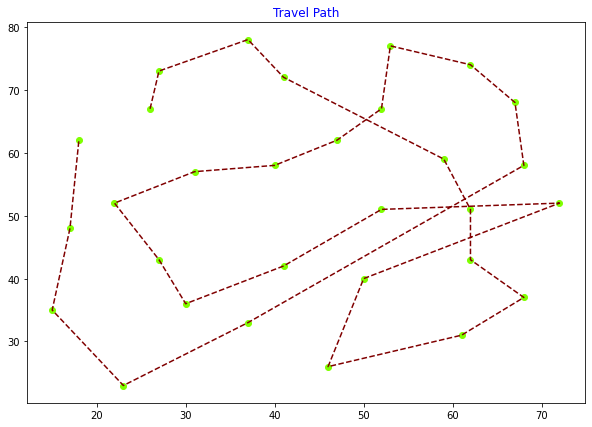

In [4]:
print("EndPath :",chromo[0])
endval=cost(chromo[0],DIC)
print("EndVal =",endval)
showPlot(chromo[0],'Travel Path')

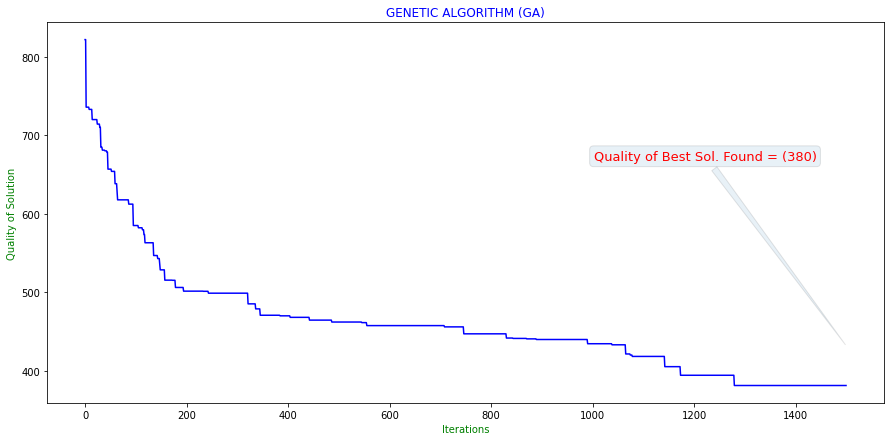

In [5]:
plt.figure(figsize=(15,7))
plt.plot(valRec,color='b')
plt.title('GENETIC ALGORITHM (GA)',color='blue')
plt.xlabel('Iterations',color ='green')
plt.ylabel('Quality of Solution',color ='green')
plt.annotate('Quality of Best Sol. Found = (%.2d)'%( endval), xy=(endItt, endval+50),color="red",xycoords='data',
             xytext=(-30, 190), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
plt.show()